# Momentum Based Gradient Descent Algorithm 
This section aims to use momentum based GD to solve the optimization of the following error function:
$$𝑓(𝑥,𝑦)=𝑧=-\sqrt{25−(𝑥−2)^2−(𝑦−3)^2}$$

This function is the bottom half of a sphere.  

**Equation and Description of Momentum Based Gradient Descent:**
$$ update_{t} = \gamma*update_{t-1} + \eta* \frac{\partial z}{\partial t}\|{{\scriptscriptstyle t}}$$
$$ x_{t+1} = x_{t} \pm update_{t}$$

Momentum differs in the way it converges to a solution compared to vanilla gradient descent.  It reduces the risk of getting stuck in a local minimum, as well as speeds up the convergence considerably in cases where the process would otherwise zig-zag heavily.  It uses a momentum term in analogy to "the mass of Newtonian particles that move through a viscous medium in a conservative force field".

<img src="https://drive.google.com/uc?id=1VLEQ4dnEt4R7V-HptLMAOZ549IUK8nex" width="400" height="300" />  


## Implementation of The Momentum Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Function defs of the function and the partial derivatives
def sphere_function(x,y):
  z = math.sqrt((25 - (x-2)**2 - (y-3)**2)) # ** for carrot (^) symbol
  return z

def dz_dx(x,y):
  output = (x-2) / math.sqrt(25 - (x-2)**2 - (y-3)**2)
  return output

def dz_dy(x,y):
  output = (y-3) / math.sqrt(25 - (x-2)**2 - (y-3)**2)
  return output

In [3]:
max_steps = 2000

# GD base parameters
learning_rate = 0.01
x_current = 0
y_current = 0
x_history = np.zeros(max_steps)
y_history = np.zeros(max_steps)
# Momentum parameters
x_update = 0
y_update = 0
gamma = 0.9 # Gamma is usually set to something high between 0 and 1
for i in range(max_steps):
  x_history[i] = x_current
  y_history[i] = y_current
  dx = dz_dx(x_current,y_current)
  dy = dz_dy(x_current,y_current)
  # Minimization means subtraction of partial derivative. Increment x and y
  x_current = x_current - learning_rate * dx
  y_current = y_current - learning_rate * dy

  # updates hold onto the values from the pervious values
  # This is where the momentum is built
  x_update = (gamma * x_update) + (learning_rate * dx)
  y_update = (gamma * x_update) + (learning_rate * dy)
  x_current = x_current - x_update # Subtract for minimization
  y_current = y_current - y_update

Number of iterations =  2000
Max x value from gradient descent:  1.9999999999999967
Max y value from gradient descent:  2.9996799416076954


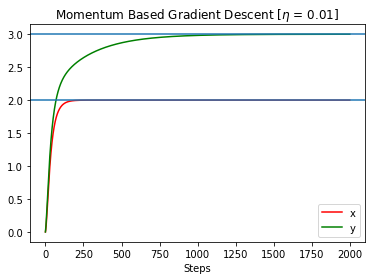

In [4]:
# Plotting the histories to see where convergence occurs
plt.plot(x_history, 'r')
plt.plot(y_history , 'g')
plt.legend(['x', 'y'],loc="best")
plt.title("Momentum Based Gradient Descent [$\eta$ = 0.01]")
plt.xlabel("Steps")
plt.axhline(y=2, xmin=0, xmax=7500)
plt.axhline(y=3, xmin=0, xmax=7500)
print("Number of iterations = ", max_steps)
print("Max x value from gradient descent: ", x_history[max_steps-1])
print("Max y value from gradient descent: ", y_history[max_steps-1])

### Decay of Error Function
Another useful way to look at how quickly x or y converge is too look at the decay of the error function.  This is a much more useful way to check for convergence, since you don't have to keep in mind the value that you need to converge to. You just have to see when the error gets close enough to zero for us to be satified.
$$x_{error} = convergenceValue - x_{i}$$

Text(0.5, 0, 'Steps')

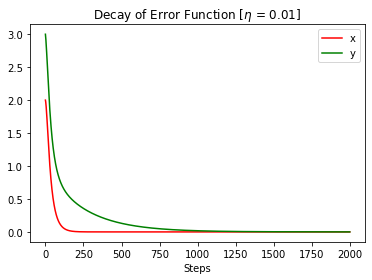

In [5]:
loss_x = 2 - x_history
loss_y = 3 - y_history
plt.plot(loss_x, 'r')
plt.plot(loss_y, 'g')
plt.legend(['x', 'y'],loc="best")
plt.title("Decay of Error Function [$\eta$ = 0.01]")
plt.xlabel("Steps")

In [6]:
# Now, we ought to check how quickly this convergence actually happens
# Input: 'x' or 'y' as strings, which tells the function which function to
# count the number of convergence steps for. 
# Output: Number of steps it took for the GD algorithm to converge to a solution
# This exact convergence occurs when the diffrential increments dx or dy come
# close to zero.  It never will reach zero, so we set a threshold, epsilon, to
# 0.00001, where we are close enough to our solution.
def convergence_steps(x_or_y):
  # GD base parameters
  max_steps = 6000
  learning_rate = 0.01
  epsilon = 0.000001
  x_current = 0
  y_current = 0
  # Momentum parameters
  x_update = 0
  y_update = 0
  gamma = 0.9 # Gamma is usually set to something high between 0 and 1
  for i in range(max_steps):
    dx = dz_dx(x_current,y_current)
    dy = dz_dy(x_current,y_current)
    # Minimization means subtraction of partial derivative. Increment x and y
    x_current = x_current - learning_rate * dx
    y_current = y_current - learning_rate * dy

    # updates hold onto the values from the pervious values
    # This is where the momentum is built
    x_update = (gamma * x_update) + (learning_rate * dx)
    y_update = (gamma * x_update) + (learning_rate * dy)
    x_current = x_current - x_update # Subtract for minimization
    y_current = y_current - y_update
  
    # Check if convergence is for x or y variable
    if (x_or_y == 'x'):
      # Take the absolute of dx and dy to handle +/- values
      if (abs(dx) <= epsilon):
        num_steps = i
        return num_steps
    elif (x_or_y == 'y'):
      if (abs(dy) <= epsilon):
        num_steps = i
        return num_steps

# Calculate number of iterations needed to converge to the minimum value of z
convergence_steps_x = convergence_steps('x')
convergence_steps_y = convergence_steps('y')

print("For an initial value of x = 0 and y = 0:")
print("Steps needed to converge to x: ", convergence_steps_x)
print("Steps needed to converge to y: ", convergence_steps_y)

For an initial value of x = 0 and y = 0:
Steps needed to converge to x:  430
Steps needed to converge to y:  3037


## Comparison between Gradient Descent and Momentum Based Gradient Descent

GD has trouble converging to a solution when there is no slope along the curve for an increment to occur.  This means that it cannot converge if the initial point is on a flat part of the curve with no slope.

The way momentum based gradient descent (MGD) aims to solve this problem is by building momentum.

For an initial value of x = 0 and y = 0 and hyperparameters $\epsilon = 0.000001$, $\eta = 0.01$, and $\lambda = 0.9$:  
* _Vanilla gradient descent:_  
Steps needed to converge to x:  6373   
Steps needed to converge to y:  6576  
* _Gradient descent with momentum:_  
Steps needed to converge to x:  430  
Steps needed to converge to y:  3037  

**Plots of convergence patterns:**  
<img src="https://drive.google.com/uc?id=1kNH2JFnVGMGJUce2ZmB2SYu720X0UXXC" width="400" height="300" />
<img src="https://drive.google.com/uc?id=1sYZBxb0JN1-cfLg-eJRMJ69YGWsrUEcp" width="400" height="300" />  

The number of steps used for the momentum simlulation was only 2000 because of how much quicker it converged.  With all parameters held the same and using the same error function, momentum took considerably less steps to converge to a solution.  
